DOMAIN: Sports management


CONTEXT: Company X is a sports management company for international cricket.


DATA DESCRIPTION: The data is collected belongs to batsman from IPL series conducted so far. Attribute Information:
1. Runs: Runs score by the batsman
2. Ave: Average runs scored by the batsman per match
3. SR: strike rate of the batsman
4. Fours: number of boundary/four scored
5. Six: number of boundary/six scored
6. HF: number of half centuries scored so far


PROJECT OBJECTIVE: Goal is to build a data driven batsman ranking model for the sports management company to make business decisions

In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [47]:
df = pd.read_csv("Part4 - batting_bowling_ipl_bat.csv")

In [48]:
df.shape

(180, 7)

In [49]:
df.head(10)

,Name,Runs,Ave,SR,Fours,Sixes,HF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [50]:
df.dtypes

Name      object
Runs     float64
Ave      float64
SR       float64
Fours    float64
Sixes    float64
HF       float64
dtype: object

In [51]:
df = df.dropna()

In [52]:
df.head()

,Name,Runs,Ave,SR,Fours,Sixes,HF
1,CH Gayle,733.0,61.08,160.74,46.0,59.0,9.0
3,G Gambhir,590.0,36.87,143.55,64.0,17.0,6.0
5,V Sehwag,495.0,33.00,161.23,57.0,19.0,5.0
7,CL White,479.0,43.54,149.68,41.0,20.0,5.0
9,S Dhawan,569.0,40.64,129.61,58.0,18.0,5.0


In [54]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Runs,90.0,219.933333,156.253669,2.00,98.000,196.500,330.7500,733.00
Ave,90.0,24.729889,13.619215,0.50,14.665,24.440,32.1950,81.33
SR,90.0,119.164111,23.656547,18.18,108.745,120.135,131.9975,164.10
Fours,90.0,19.788889,16.399845,0.00,6.250,16.000,28.0000,73.00
Sixes,90.0,7.577778,8.001373,0.00,3.000,6.000,10.0000,59.00
HF,90.0,1.188889,1.688656,0.00,0.000,0.500,2.0000,9.00


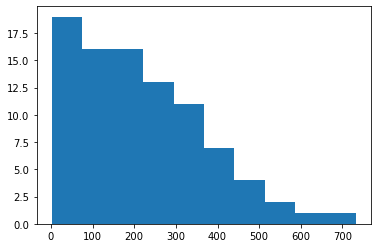

In [55]:
#Get the distribution of runs scored by the players
plt.hist(df['Runs']);

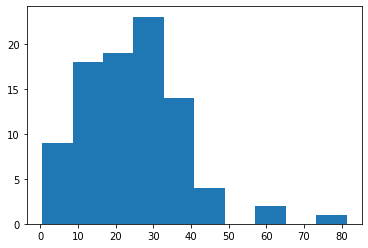

In [56]:
#Get the distribution of average scored by the players
plt.hist(df['Ave']);

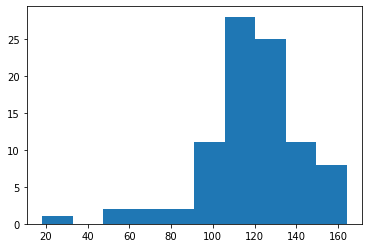

In [57]:
#Get the distribution of strike rate scored by the players
plt.hist(df['SR']);

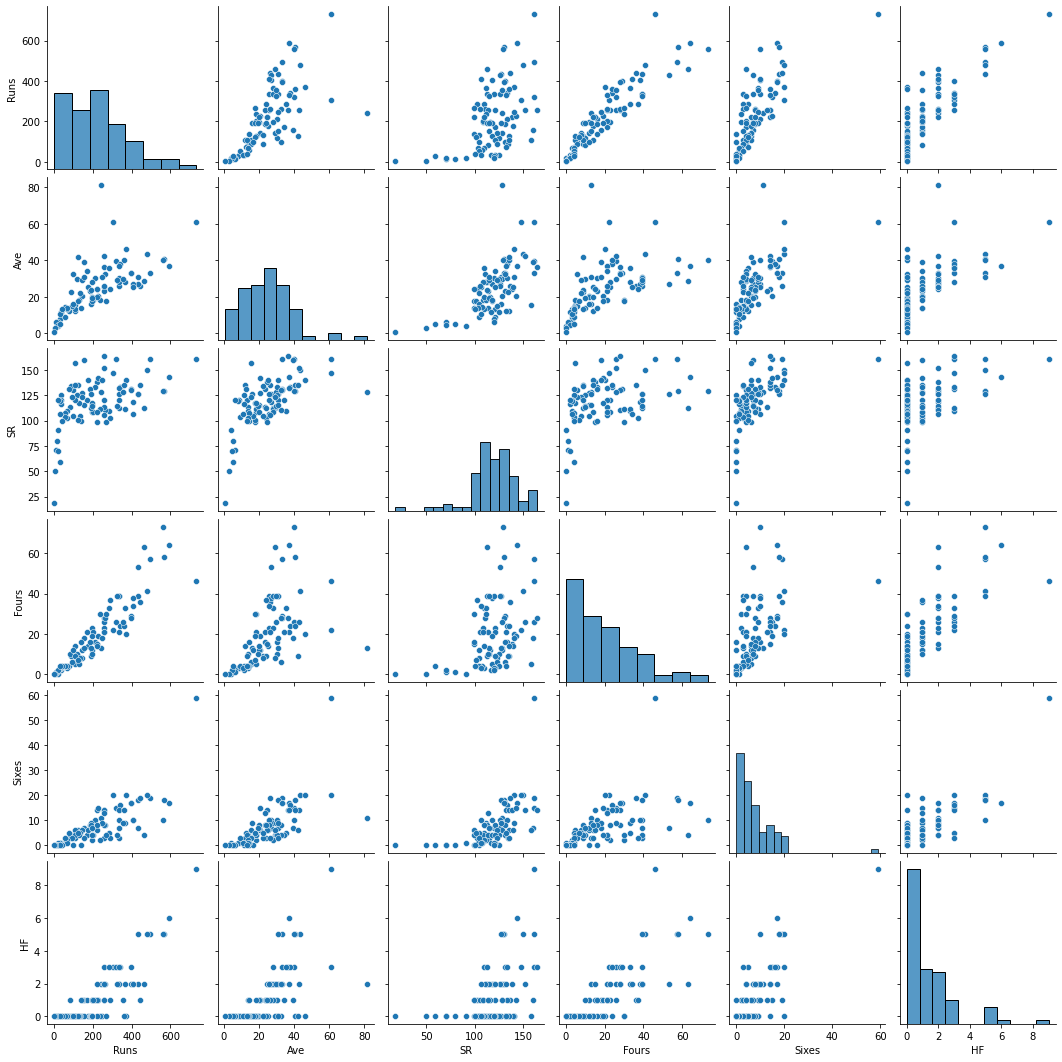

In [58]:
sns.pairplot(df);

In [82]:
from scipy.stats import zscore
numeric_cols = df.select_dtypes(include=[np.float64]).columns
df_std = df.copy();
df_std = df_std[numeric_cols].apply(zscore)

In [83]:
df_std

,Runs,Ave,SR,Fours,Sixes,HF
1,3.301945,2.683984,1.767325,1.607207,6.462679,4.651551
3,2.381639,0.896390,1.036605,2.710928,1.184173,2.865038
5,1.770248,0.610640,1.788154,2.281703,1.435530,2.269533
7,1.667276,1.388883,1.297182,1.300618,1.561209,2.269533
9,2.246490,1.174755,0.444038,2.343021,1.309851,2.269533
...,...,...,...,...,...,...
171,-1.338197,-1.382959,-2.065234,-1.152093,-0.952365,-0.707989
173,-1.293147,-1.475256,-2.074160,-1.090775,-0.952365,-0.707989
175,-1.222355,-1.456796,-2.565132,-0.968140,-0.952365,-0.707989
177,-1.376812,-1.604470,-2.940057,-1.213411,-0.952365,-0.707989


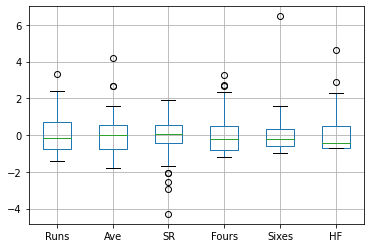

In [84]:
df_std.boxplot();

In [79]:
Q1 = df_std.quantile(0.25)
Q3 = df_std.quantile(0.75)
IQR = Q3 - Q1
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df_std < Q1 - 1.5 * IQR)[0], np.where(df_std < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df_std.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df_std > Q3 + 1.5 * IQR)[0], np.where(df_std > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df_std.iloc[i,j] = whisker[j]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


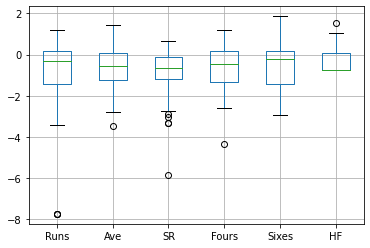

In [80]:
df_std.boxplot();

In [86]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(df_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [87]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.4582608  -0.26643209 -0.70483594 -0.45840889  0.10977942  0.00520142]
 [-0.39797313  0.33111756  0.0606373   0.10122837 -0.00550486 -0.84736307]
 [-0.3253838   0.69780334 -0.05624934  0.11890348  0.45013448  0.43275029]
 [-0.40574167 -0.47355804  0.58514214 -0.09676885  0.50823538  0.03252305]
 [-0.41733459  0.17902455  0.35786211 -0.39458014 -0.66942589  0.24878157]
 [-0.43237178 -0.27593225 -0.16096217  0.77486668 -0.28082541  0.17811777]]

 Eigen Values 
%s [4.30252561 0.83636692 0.01706297 0.16567829 0.41665751 0.32912443]


In [48]:
#Step 3: find variance and cumulative variance by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 74.1735041   88.05708193  92.68718036  96.46277056  99.5781481
 100.        ]


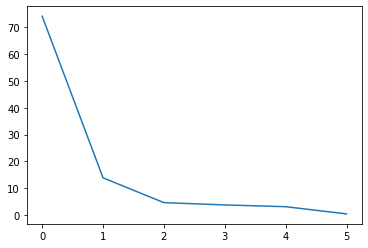

In [49]:
plt.plot(var_exp)

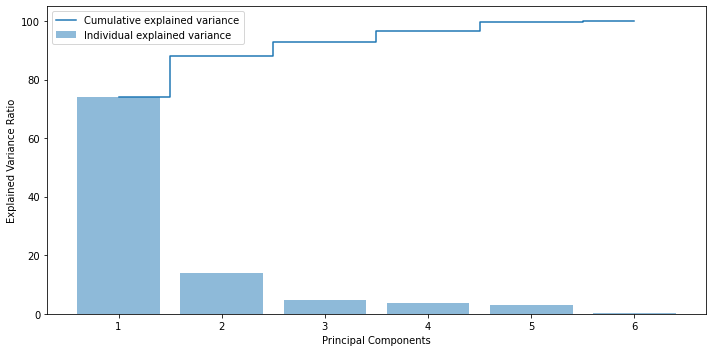

In [50]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

The first PCA component value 4.30 gives a good coverage and is greater than all other eigen values. Therefore, we can use the vetors of the first eigen value to come to a score calculated by

S=  def_std . eig_vals

In [53]:
Score = abs(df_std.dot(eig_vals))

In [58]:
ranking = pd.DataFrame(data={"Name":df.Name, "Score":Score})

In [64]:
ranking_sorted = ranking.sort_values(by=['Score'], ascending=False)
ranking_sorted

,Name,Score
1,CH Gayle,13.531880
3,G Gambhir,10.388590
9,S Dhawan,10.073643
11,AM Rahane,9.669877
7,CL White,8.022122
...,...,...
53,KA Pollard,0.217635
105,JEC Franklin,0.137860
69,MS Bisla,0.131054
115,KD Karthik,0.101510


<BarContainer object of 90 artists>

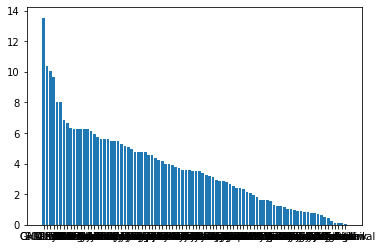

In [68]:
plt.bar(ranking_sorted['Name'], ranking_sorted['Score'])